## Observations

1. Urban fares have the largest percentage of total fares (62.7%) compared against other city types. 
2. Rural rides have the smallest percentage of total rides (5.3%) compared against other city types.
3. Surburban cities have the second highest percentage of total drivers (16.5%) compared against other city types. 

In [76]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = pd.merge(city_data,ride_data,on="city")
# Display the data table for preview
merged_data.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

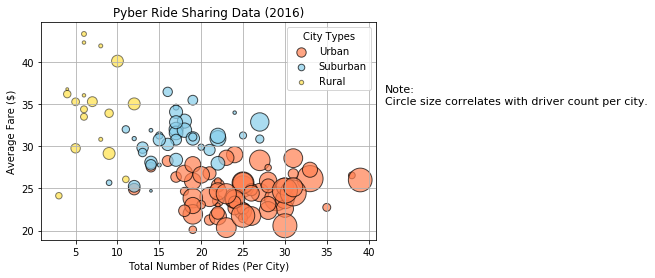

In [82]:
# Obtain the x and y coordinates for urban cities
urban = merged_data.loc[merged_data['type'] == "Urban"]
urban_city = urban.groupby("city")
urban_rides = urban_city["ride_id"].count()
urban_fare = urban_city["fare"].mean()
urban_size = urban_city["driver_count"].sum()

#obtain x and y coordinates for suburban cities
suburban = merged_data.loc[merged_data['type'] == "Suburban"]
sub_city = suburban.groupby("city")
sub_rides = sub_city["ride_id"].count()
sub_fare = sub_city["fare"].mean()
sub_size = sub_city["driver_count"].sum()

#obtain x and y coordinates for rural cities
rural = merged_data.loc[merged_data["type"] == "Rural"]
rural_city = rural.groupby("city")
rural_rides = rural_city["ride_id"].count()
rural_fare = rural_city["fare"].mean()
rural_size = rural_city["driver_count"].sum()

# Build the scatter plots for each city types
Urban = plt.scatter(urban_rides,urban_fare,alpha=0.7,s=urban_size*.3,
                    c="coral",edgecolor='black',label="Urban")
Suburban = plt.scatter(sub_rides,sub_fare,alpha=0.7,s=sub_size*.5,
                    c="skyblue",edgecolor='black',label="Suburban")
Rural = plt.scatter(rural_rides,rural_fare,alpha=0.5,s=rural_size*2,
                    c="gold",edgecolor='black',label="Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
legend = plt.legend(handles=[Urban,Suburban,Rural],title="City Types")

# Incorporate a text label regarding circle size
plt.text(42,35,'Note:\nCircle size correlates with driver count per city.',
         fontsize=11)

# Save Figure
plt.savefig("data/ride_sharing_data.png")

## Total Fares by City Type

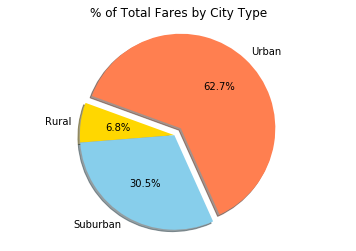

In [83]:
# Calculate Type Percents
type_grouped = merged_data.groupby("type")
total_fares = type_grouped["fare"].sum()

#establish colors, labels, and explode value for all charts
colors = ["gold","skyblue","coral"]
labels = ["Rural","Suburban","Urban"]
explode=(0,0,.1)

# Build Pie Chart
plt.pie(total_fares,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("data/total_fares_by_city_type.png")

#Show Figure
plt.show()

## Total Rides by City Type

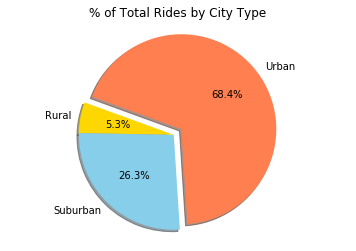

In [84]:
# Calculate Ride Percents
total_rides = type_grouped["ride_id"].count()

# Build Pie Chart
plt.pie(total_rides,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/total_rides_by_city_type.png")

#Show Figure
plt.show()

## Total Drivers by City Type

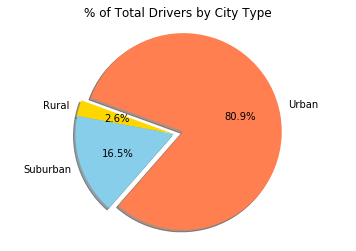

In [85]:
#create variables to store counts by city type
rural_count = 0
suburban_count = 0
urban_count = 0

#iterate through rows in merged_data to count the unique values by city 
#and city type
row_iterator = merged_data.iterrows()
last = next(row_iterator)
for i,row in row_iterator:
    if row[0] != last[0]:
        if row[2] == "Rural":
            rural_count += row[1]
        if row[2] == "Suburban":
            suburban_count += row[1]
        if row[2] == "Urban":
            urban_count += row[1]
    last = row
    
#calculate percentages 
total = (urban_count+suburban_count+rural_count)
rural_count = (rural_count/total)*100
suburban_count = (suburban_count/total)*100
urban_count = (urban_count/total)*100

#plot
data = [rural_count,suburban_count,urban_count]
plt.pie(data,explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=160)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("data/total_drivers_by_city_type.png")

# Show Figure
plt.show()